# Problem Background

## Price Prediction Model - the BEST one. Period. 

### Background Information


<img src='https://www.topgear.com/sites/default/files/cars-car/carousel/2019/01/dg019_004clan2kt8c8qmtrmpcl3p72agsepl.jpg?w=976&h=549' />

### Code Index

<div class="alert alert-block alert-info">
<p>1. Problem Induction & Motivation</p>
<p>2. Weekly Based Structure</p>
<p>3. Data Preparation</p>
<p>4. Data Visualization</p>
<p>5. Modeling</p>
<p>6. Deployment</p>
<p>7. Appendix</p>
<p>8. Daily Log and Credential Log</p>
</div>

### 1. Problem Induction & Motivation

>**Define your mission!**
>>The goal for this data challenge to determine accurate *Manufacturer Suggested Price* (MSRP). MSRP is the manufacturer's suggested retail price, also known as the window price or sticker price, is the suggested price of buying a vehicle or other high-priced item.

>**Real-World Impact!**
>>The MSRP is designed to keep prices at the same level from store to store. But retailers are not required to use this price, and consumers do not always pay the MSRP when they make purchases. Items may be sold for a lower price so a company can reasonably move inventory off shelves, especially in a sluggish economy.Many retailers will sell products below the MSRP to reduce inventory, attract more consumers, or during a sluggish economy. Conversely, some retailers will set prices higher than the MSRP for products in high demand.

>**Who asked for this?**
>>Car Manufacturers, Potential Car Buyers, "Local" Car Dealers, "Local" Car Retailers 

>**Start Point**
>>Completely understand the impact of MSRP.

>**End Point**
>>Answer following questions:-
>>>- [ ] Are you satisfied with your final model's performance? Why or Why not?
>>>- [ ] What do you purpose for next steps?
>>>- [ ] What would you do differently if you could?
>>>- [ ] Based on your findings - what would you want to communicate to business leadership in this industry?

### 2. Weekly Based Structure 

**Define Timeline of the project** - There will be always 3 review dates.
- [ ] Review #1 - Complete Data Preparation (12 Sept 2022)
- [ ] Review #2 - Train 3 regression models (16 Sept 2022)
- [ ] Review #3 - Final review and submit the worksheet (20 Sept 2022)

### 3. Data Preparation

- [ ] Checking for duplicate records and deleting them if they exist
- [ ] Outlier detection and treatment
- [ ] Handling of missing values
- [ ] Conversion of cetagorical variables to binary variables
- [ ] Feature selection
- [ ] Train/Test Split


### 3a. Project Dependencies

In [188]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import math

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

import statsmodels.api as sm

In [122]:
def my_summary_stats(X,feature_list):
    temp = pd.DataFrame(dict(mean = X[feature_list].mean().round(2),
                             median = X[feature_list].median().round(2),
                             std_dev = X[feature_list].std().round(2),
                             min_val = X[feature_list].min().round(2),
                             max_val = X[feature_list].max().round(2),
                             outlier_issue = np.where(X[feature_list].std()/X[feature_list].mean() > 2,
                                                      True,False)
                            ))
    return temp

def target_by_cats(X):
    '''
    This function assumes the input dataframe (X) has a numerically defined target
    variable in the first column and that all remaining features are categorical
    '''
    global_mean = X.iloc[:,0].mean()
    target = X.columns[0]
    for col in X.columns[1:]:
        df_group = X.groupby(by=col)[target].agg(['mean']).round(2)
        df_group['diff'] = (df_group['mean'] - global_mean).round(2)
        display(df_group)

In [123]:
def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','Adj-R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create adj_R2
    adj_r2 = (1-(1-r2_score(y_train,y_hat))*(len(y_train)-1)/(len(y_train)-len(model.coef_)-1)).round(3)

    
    train_metrics = [r2, adj_r2,
                     mean_absolute_error(y_train,y_hat).round(3),
                     mean_absolute_percentage_error(y_train,y_hat).round(3)*100,
                     (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
                    ]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    (1-(1-r2_score(y_test,y_hat))*(len(y_test)-1)/(len(y_test)-len(model.coef_)-1)).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    print(all_metrics)

><h4> Reading Data </h4>
Get the grasp of data

In [124]:
df = pd.read_csv('data.csv')
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.00,6.00,AUTOMATIC,front wheel drive,4.00,Luxury,Midsize,Sedan,26,17,61,28995


>It is necessary to remove whitespaces and intraspaces between column headers.

In [125]:
df.columns = [x.lower() for x in df.columns]

In [126]:
[x for x in df.columns if x.endswith(' ') or x.startswith(' ')]

[]

In [127]:
df.columns = df.columns.str.replace(' ', '_')

In [128]:
df.tail()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11909,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.00,6.00,AUTOMATIC,front wheel drive,4.00,Luxury,Midsize,Sedan,26,17,61,28995


><h3>Key Takeaways</h3>

>> **Total Number of Records** = 11913 <br><br>
>> **Target Variable** = MSRP <br><br>
>> **Other Observations:**
>>> 1. We can also predict how many years does each company take to release a new model on average. <br><br>
>>> 2. We can also calculate the probability of what kind of engine fuel type will the new car can have based on other data.<br><br>

| Feature          	| Thoughts/Expectations                     	|
|------------------	|-------------------------------------------	|
| Make:            	| Positive correlation (+)                   	|
| Model:        	| Indicator (neutral)                           |
| Year:  	        | (neutral)                                   	|
| Engine Fuel Type: | Positive correlation (+)                  	|
| Engine HP:    	| Positive correlation (+)                     	|
| Engine Cylinders:	| Positive correlation (+)                  	|
| Transmission Type:| Positive correlation (+)                   	|
| Driven_Wheels:  	| Not Sure                                  	|
| Number of Doors:	| Negative correlation (-)                    	|
| Market Category: 	| Not sure but effects (|)                     	|
| Vehicle Size:    	| Not sure but effects (|)        	            |
| Vehicle Style:   	| Not sure but effects (|)                     	|
| Highway MPG:    	| Not sure but effects (|)                     	|
| City MPG:       	| Not sure but effects (|)                     	|
| Popularity:     	| Positive correlation (+)                     	|
| MSRP:            	| TARGET                                     	|

>We now need to confirm that data columns have consitent datatype or if not, so we shall fix.

In [129]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

>Checking null values, if they exist we need to find ways to fix those rows.

In [130]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [131]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
make,11914,48,Chevrolet,1123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,11914,915,Silverado 1500,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,11914.00,NaN,NaN,NaN,2010.38,7.58,1990.00,2007.00,2015.00,2016.00,2017.00
engine_fuel_type,11911,10,regular unleaded,7172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine_hp,11845.00,NaN,NaN,NaN,249.39,109.19,55.00,170.00,227.00,300.00,1001.00
engine_cylinders,11884.00,NaN,NaN,NaN,5.63,1.78,0.00,4.00,6.00,6.00,16.00
transmission_type,11914,5,AUTOMATIC,8266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
driven_wheels,11914,4,front wheel drive,4787,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_doors,11908.00,NaN,NaN,NaN,3.44,0.88,2.00,2.00,4.00,4.00,4.00
market_category,8172,71,Crossover,1110,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>**Key Takeaways** 

>>1. Our data has "Chevrolet" as the top manufacturer.
>>2. The data contains alot of models produced in "2017"
>>3. The data would be able to predict MSRP accurately for 5 engine cylinder cars
>>4. We will need to drop number of doors as the mean is 3 which is not usual in car.
>>5. We will need to drop rows that have Null values in Engine HP and Engine Cylinder as they are less than 1% of data.
>>6. Market Category can help us determine how much MSRP should be but since more than 40% rows are missing, we should drop Market Category column.

>**Columns to drop**
>>1. Model 
>>2. Market Category

In [132]:
# Dropping following columns - 
# 1. Model
# 2. Market Category

df = df.drop('model', axis = 1)
df = df.drop('market_category', axis = 1)

# Drop all rows that contain missing values
df = df.dropna()

# drop any duplicate records
df.drop_duplicates(inplace=True)

In [133]:
df.tail()

,make,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11909,Acura,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,2013,premium unleaded (recommended),300.00,6.00,AUTOMATIC,all wheel drive,4.00,Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,2006,regular unleaded,221.00,6.00,AUTOMATIC,front wheel drive,4.00,Midsize,Sedan,26,17,61,28995


In [134]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,11083.00,2010.71,7.23,1990.00,2007.00,2015.00,2016.00,2017.00
engine_hp,11083.00,253.58,110.20,55.00,172.00,240.00,303.00,1001.00
engine_cylinders,11083.00,5.69,1.77,0.00,4.00,6.00,6.00,16.00
number_of_doors,11083.00,3.45,0.87,2.00,2.00,4.00,4.00,4.00
highway_mpg,11083.00,26.28,7.48,12.00,22.00,25.00,30.00,354.00
city_mpg,11083.00,19.30,6.61,7.00,16.00,18.00,22.00,137.00
popularity,11083.00,1556.94,1443.94,2.00,549.00,1385.00,2009.00,5657.00
msrp,11083.00,41940.94,61757.63,2000.00,21587.50,30600.00,43037.50,2065902.00


In [135]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_temp = df.select_dtypes(include=numerics)

In [136]:
pd.DataFrame(dict(mean = df_temp.mean().round(2),                  
                  median = df_temp.median().round(2),
                  std_dev = df_temp.std().round(2),
                  min_val = df_temp.min().round(2),
                  max_val = df_temp.max().round(2),
                  missing_vals = df_temp.isnull().sum()
                 ))

,mean,median,std_dev,min_val,max_val,missing_vals
year,2010.71,2015.00,7.23,1990.00,2017.00,0
engine_hp,253.58,240.00,110.20,55.00,1001.00,0
engine_cylinders,5.69,6.00,1.77,0.00,16.00,0
number_of_doors,3.45,4.00,0.87,2.00,4.00,0
highway_mpg,26.28,25.00,7.48,12.00,354.00,0
city_mpg,19.30,18.00,6.61,7.00,137.00,0
popularity,1556.94,1385.00,1443.94,2.00,5657.00,0
msrp,41940.94,30600.00,61757.63,2000.00,2065902.00,0


<AxesSubplot:xlabel='msrp', ylabel='Count'>

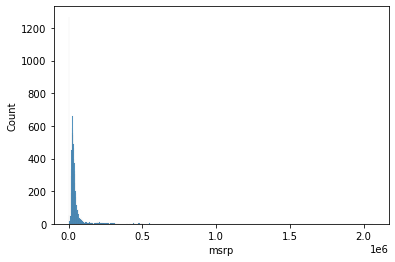

In [137]:
sns.histplot(df_temp['msrp'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='msrp'>

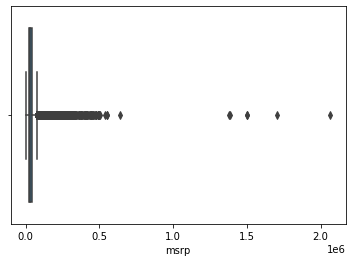

In [138]:
sns.boxplot(df_temp['msrp'])

In [139]:
df_temp.sort_values(by='msrp',ascending=False).iloc[0:10,:]

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
11362,2008,1001.00,16.00,2.00,14,8,820,2065902
11364,2009,1001.00,16.00,2.00,14,8,820,1705769
8486,2008,650.00,12.00,2.00,14,9,1158,1500000
11363,2008,1001.00,16.00,2.00,14,8,820,1500000
6351,2012,620.00,12.00,4.00,16,10,67,1382750
6350,2011,620.00,12.00,4.00,16,10,67,1380000
4024,2003,660.00,12.00,2.00,12,7,2774,643330
1626,2015,720.00,12.00,2.00,16,10,1158,548800
1622,2014,720.00,12.00,2.00,16,10,1158,548800
1629,2016,750.00,12.00,2.00,18,11,1158,535500


In [140]:
pd.DataFrame(dict(mean = df_temp.mean().round(2),
                  median = df_temp.median().round(2),
                  std_dev = df_temp.std().round(2),
                  min_val = df_temp.min(),
                  max_val = df_temp.max(),
                  missing_vals = df_temp.isnull().sum()
                  
                 ))

,mean,median,std_dev,min_val,max_val,missing_vals
year,2010.71,2015.00,7.23,1990.00,2017.00,0
engine_hp,253.58,240.00,110.20,55.00,1001.00,0
engine_cylinders,5.69,6.00,1.77,0.00,16.00,0
number_of_doors,3.45,4.00,0.87,2.00,4.00,0
highway_mpg,26.28,25.00,7.48,12.00,354.00,0
city_mpg,19.30,18.00,6.61,7.00,137.00,0
popularity,1556.94,1385.00,1443.94,2.00,5657.00,0
msrp,41940.94,30600.00,61757.63,2000.00,2065902.00,0


### List of attributes we are looking in -

>>- **1. Engine HP**
>>- **2. Engine Cylinders**
>>- **3. Number of doors**
>>- **4. City MPG**

> List of attributes we are dropping with reason
>>- **Highway MPG** - The correlation between (MSRP vs City MPG) is as similar as (MSRP vs Highway MPG)
>>- **Popularity** - A supercar will definitely will have higher popularity as compared to 4 door hatchback which will be poor indicator variable to predict MSRP w.r.t business' perspective.

>**Engine_HP**

> I want to first explore the attribute "**engine_hp**"

In [141]:
df['engine_hp'].max()
#df_temp = df[df[''].isnull()]
df_temp=df[df['engine_hp'].isnull()]
print(df_temp)

Empty DataFrame
Columns: [make, year, engine_fuel_type, engine_hp, engine_cylinders, transmission_type, driven_wheels, number_of_doors, vehicle_size, vehicle_style, highway_mpg, city_mpg, popularity, msrp]
Index: []


<AxesSubplot:xlabel='engine_hp', ylabel='Count'>

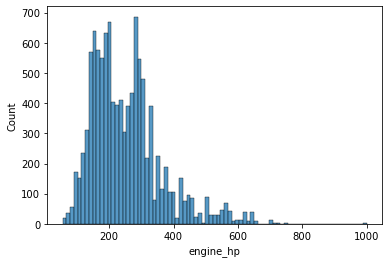

In [142]:
sns.histplot(df['engine_hp'])

In [143]:
df['engine_hp'].describe().T

count   11083.00
mean      253.58
std       110.20
min        55.00
25%       172.00
50%       240.00
75%       303.00
max      1001.00
Name: engine_hp, dtype: float64

>As we can see from histogram, we will need to loose all the values where HP>600 because they are the outliers and according to business needs this model is for "local" car dealers, thus to increase the accuracy dropping all the rows where HP>600

In [144]:
df_temp = df.select_dtypes(include=numerics)
df_temp = df_temp[df_temp['engine_hp'] < 600]

In [145]:
pd.DataFrame(dict(mean = df_temp.mean().round(2),
                  median = df_temp.median().round(2),
                  std_dev = df_temp.std().round(2),
                  min_val = df_temp.min(),
                  max_val = df_temp.max(),
                  missing_vals = df_temp.isnull().sum()
                  
                 ))

,mean,median,std_dev,min_val,max_val,missing_vals
year,2010.67,2015.00,7.26,1990.00,2017.00,0
engine_hp,248.16,235.00,100.43,55.00,597.00,0
engine_cylinders,5.62,6.00,1.67,0.00,12.00,0
number_of_doors,3.47,4.00,0.87,2.00,4.00,0
highway_mpg,26.38,26.00,7.47,12.00,354.00,0
city_mpg,19.40,18.00,6.59,8.00,137.00,0
popularity,1559.41,1385.00,1447.94,2.00,5657.00,0
msrp,38490.40,30335.00,41506.88,2000.00,492425.00,0


In [146]:
df_temp.sort_values(by='engine_hp',ascending=False)

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
473,2015,597.00,8.00,2.00,17,13,2774,291744
469,2014,597.00,8.00,2.00,17,13,2774,288000
6998,2012,592.00,8.00,2.00,22,15,416,229000
9685,2015,583.00,8.00,2.00,19,13,617,221580
9686,2015,583.00,8.00,2.00,19,13,617,228080
...,...,...,...,...,...,...,...,...
4660,1991,63.00,4.00,2.00,38,30,5657,2000
2528,1990,62.00,4.00,2.00,44,36,2202,2000
2533,1991,62.00,4.00,2.00,44,36,2202,2000
6794,1999,55.00,3.00,2.00,42,34,1385,2000


In [147]:
df = df[df['engine_hp']<400]

In [148]:
df.head()

,make,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,2011,premium unleaded (required),335.00,6.00,MANUAL,rear wheel drive,2.00,Compact,Coupe,26,19,3916,46135
1,BMW,2011,premium unleaded (required),300.00,6.00,MANUAL,rear wheel drive,2.00,Compact,Convertible,28,19,3916,40650
2,BMW,2011,premium unleaded (required),300.00,6.00,MANUAL,rear wheel drive,2.00,Compact,Coupe,28,20,3916,36350
3,BMW,2011,premium unleaded (required),230.00,6.00,MANUAL,rear wheel drive,2.00,Compact,Coupe,28,18,3916,29450
4,BMW,2011,premium unleaded (required),230.00,6.00,MANUAL,rear wheel drive,2.00,Compact,Convertible,28,18,3916,34500


In [149]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,9997.00,2010.36,7.44,1990.00,2006.00,2015.00,2016.00,2017.00
engine_hp,9997.00,227.00,74.14,55.00,170.00,217.00,285.00,395.00
engine_cylinders,9997.00,5.36,1.40,0.00,4.00,6.00,6.00,12.00
number_of_doors,9997.00,3.51,0.84,2.00,3.00,4.00,4.00,4.00
highway_mpg,9997.00,26.84,7.58,12.00,22.00,26.00,31.00,354.00
city_mpg,9997.00,19.88,6.66,10.00,16.00,19.00,22.00,137.00
popularity,9997.00,1566.88,1459.71,21.00,549.00,1385.00,2009.00,5657.00
msrp,9997.00,29531.90,17382.89,2000.00,20490.00,28840.00,38600.00,359990.00


>**Engine Cylinders**

In [150]:
df_temp=df[df['engine_cylinders'].isnull()]

<AxesSubplot:xlabel='engine_cylinders', ylabel='Count'>

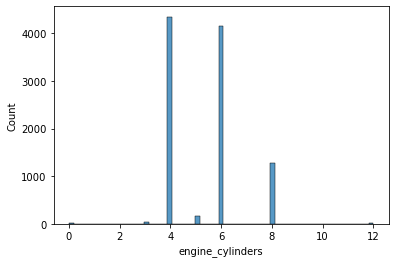

In [151]:
sns.histplot(df['engine_cylinders'])

In [152]:
df['engine_cylinders'].describe().T

count   9997.00
mean       5.36
std        1.40
min        0.00
25%        4.00
50%        6.00
75%        6.00
max       12.00
Name: engine_cylinders, dtype: float64

>>*Assumption* - This model only entertains fuel based cars and NOT electric cars, only electrics car have 0 cylinders. We are going to drop all the rows where number of cylinders is less than 4 and greater than 8

In [153]:
df_temp = df.select_dtypes(include=numerics)
df_temp = df_temp[df_temp['engine_cylinders'] < 600]
pd.DataFrame(dict(mean = df_temp.mean().round(2),
              median = df_temp.median().round(2),
              std_dev = df_temp.std().round(2),
              min_val = df_temp.min(),
              max_val = df_temp.max(),
              missing_vals = df_temp.isnull().sum()

             ))

,mean,median,std_dev,min_val,max_val,missing_vals
year,2010.36,2015.00,7.44,1990.00,2017.00,0
engine_hp,227.00,217.00,74.14,55.00,395.00,0
engine_cylinders,5.36,6.00,1.40,0.00,12.00,0
number_of_doors,3.51,4.00,0.84,2.00,4.00,0
highway_mpg,26.84,26.00,7.58,12.00,354.00,0
city_mpg,19.88,19.00,6.66,10.00,137.00,0
popularity,1566.88,1385.00,1459.71,21.00,5657.00,0
msrp,29531.90,28840.00,17382.89,2000.00,359990.00,0


In [154]:
df_temp.sort_values(by='engine_cylinders',ascending=False)

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
671,1993,389.00,12.00,4.00,15,11,617,3108
7443,2001,322.00,12.00,4.00,15,11,86,259900
764,1997,322.00,12.00,2.00,19,12,3916,7624
9432,2002,322.00,12.00,4.00,15,11,86,229990
762,1996,322.00,12.00,2.00,19,12,3916,6954
...,...,...,...,...,...,...,...,...
9867,2014,140.00,0.00,4.00,109,128,1385,26685
1680,2015,177.00,0.00,4.00,82,85,617,41450
1681,2016,177.00,0.00,4.00,82,85,617,41450
1682,2017,177.00,0.00,4.00,82,85,617,39900


In [155]:
df = df[df['engine_cylinders']<8]

In [156]:
df = df[df['engine_cylinders']>3]

In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,8669.00,2010.58,7.39,1990.00,2007.00,2015.00,2016.00,2017.00
engine_hp,8669.00,214.81,67.18,62.00,162.00,201.00,274.00,380.00
engine_cylinders,8669.00,4.98,0.99,4.00,4.00,4.00,6.00,6.00
number_of_doors,8669.00,3.51,0.84,2.00,3.00,4.00,4.00,4.00
highway_mpg,8669.00,27.79,6.80,13.00,24.00,27.00,31.00,354.00
city_mpg,8669.00,20.56,5.36,11.00,17.00,19.00,23.00,58.00
popularity,8669.00,1530.28,1422.90,21.00,549.00,1385.00,2009.00,5657.00
msrp,8669.00,28405.72,15549.29,2000.00,20195.00,27670.00,37030.00,108600.00


In [158]:
df = df.drop(['popularity','highway_mpg'], axis=1)

>We can still see there are some outlier's but these are utra expensive cars, which will be later on dropped taking care of the skewedness. 

>**Diving into Statistics**

>>**Note:**
>>>Before diving into statistics - I want to explain why I have kept Year as predictor variable. Year has a positive correlation with price. We can see if we use both "Make" and "Year" together as predictor variable we can see how manufacturer producing a new car always releases the next car with higher MSRP. 

In [159]:
df.select_dtypes(include=numerics).corr()

,year,engine_hp,engine_cylinders,number_of_doors,city_mpg,msrp
year,1.00,0.42,-0.10,0.28,0.31,0.66
engine_hp,0.42,1.00,0.63,0.07,-0.43,0.75
engine_cylinders,-0.10,0.63,1.00,-0.01,-0.63,0.30
number_of_doors,0.28,0.07,-0.01,1.00,0.09,0.14
city_mpg,0.31,-0.43,-0.63,0.09,1.00,-0.07
msrp,0.66,0.75,0.30,0.14,-0.07,1.00


### Outcome

>**Most highly correlated features:**<br>
>- Engine HP (+)
>- Number of doors (-)
>- City MPG (-)
<br>
<br>
>Dropping highly redundent features - those that are highly correlated with other features (choose one)
>- Engine Cylinders (highly correlated with Engine HP)

In [160]:
df = df.drop(['engine_cylinders'], axis =1)

>Let's visualize these three variables with "MSRP" via scatterplots
>- Engine HP
>- Number of doors
>- City MPG

<AxesSubplot:xlabel='engine_hp', ylabel='msrp'>

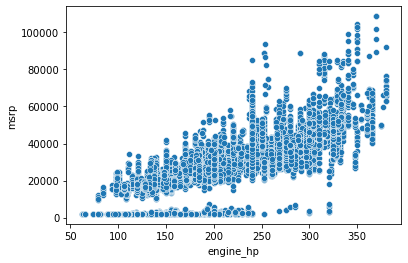

In [161]:
sns.scatterplot(x='engine_hp', y='msrp', data=df)

> We need to drop values from MSRP below 10k because how can cars have 300HP but still do not sell for more than 10K USD? Therefore, this will make engine_hp a bad predictor if these outliers are not removed.

In [162]:
df_temp = df[df['msrp']>10000]

<AxesSubplot:xlabel='engine_hp', ylabel='msrp'>

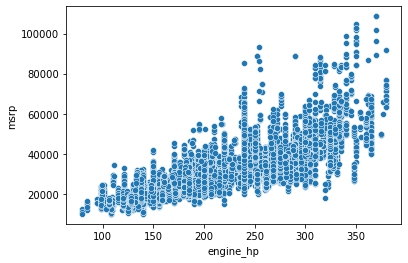

In [163]:
sns.scatterplot(x='engine_hp', y='msrp', data=df_temp)

> We can also observe the cars having MSRP more than 80K are outliers and according to business perspective we can remove these outliers.

In [164]:
df_temp = df[df['msrp']<80000]

<AxesSubplot:xlabel='engine_hp', ylabel='msrp'>

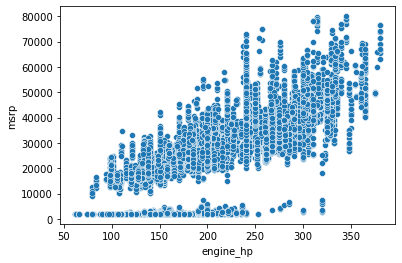

In [165]:
sns.scatterplot(x='engine_hp', y='msrp', data=df_temp)

>**Combining these two conditions in our original dataset**

In [166]:
df = df[df['msrp']<80000]

In [167]:
df = df[df['msrp']>10000]

<AxesSubplot:xlabel='engine_hp', ylabel='msrp'>

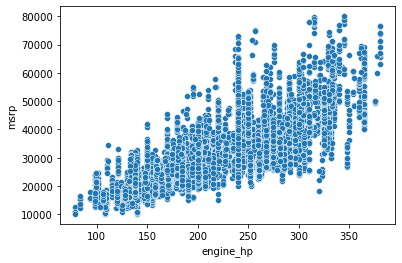

In [168]:
sns.scatterplot(x='engine_hp', y='msrp', data=df)

<AxesSubplot:xlabel='number_of_doors', ylabel='msrp'>

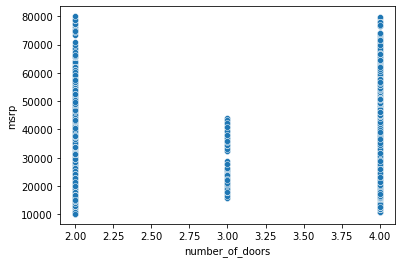

In [169]:
sns.scatterplot(x='number_of_doors', y='msrp',data=df)

<AxesSubplot:xlabel='city_mpg', ylabel='msrp'>

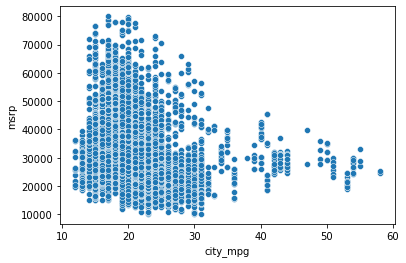

In [170]:
sns.scatterplot(x='city_mpg',y='msrp',data=df)

>**Categorical Variables**
>>Checking object data type variables before deploying these variables into models.
>- **1. MAKE**
>- **2. VEHICLE SIZE**
>- **3. VEHICLE_STYLE**
>- **4. ENGINE_FUEL_TYPE**
>- **5. TRANSMISSION_TYPE**
>- **6. DRIVEN_WHEELS**

In [172]:
categorical = ['object']

df_temp = pd.merge(df['msrp'],df.select_dtypes(include=categorical),left_index=True,right_index=True)

In [173]:
df_temp.head()

,msrp,make,engine_fuel_type,transmission_type,driven_wheels,vehicle_size,vehicle_style
0,46135,BMW,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
1,40650,BMW,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible
2,36350,BMW,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
3,29450,BMW,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
4,34500,BMW,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible


> Let's explore all categorical variables 

In [174]:
# How many unique values
df_temp['make'].unique()

array(['BMW', 'FIAT', 'Chrysler', 'Mazda', 'Nissan', 'Alfa Romeo',
       'Toyota', 'Porsche', 'Saab', 'Audi', 'GMC', 'Hyundai', 'Honda',
       'Suzuki', 'Oldsmobile', 'Kia', 'Chevrolet', 'Cadillac', 'Dodge',
       'Pontiac', 'Subaru', 'Volkswagen', 'Mercedes-Benz', 'Ford',
       'Volvo', 'Buick', 'Acura', 'Lincoln', 'Lexus', 'Mitsubishi',
       'Land Rover', 'Lotus', 'Infiniti', 'Scion', 'Genesis', 'Maserati',
       'HUMMER', 'Plymouth'], dtype=object)

In [176]:
m = {"coupe": ['coupe'],
     "convertible": ['convertible'],
     "sedan": ['sedan'],
     'wagon':['wagon'],
     'hatchback':['4dr_hatchback','2dr_hatchback'],
     'suv':['4dr_suv','2dr_suv','convertible_suv'],
     'van':['passenger_minivan','cargo_minivan','cargo_van','passenger_van'],
     'pickup':['crew_cab_pickup','regular_cab_pickup','extended_cab_pickup']
    }

# convert mapping above into a temporary dataframe
temp = pd.Series(m).explode().sort_values().to_frame().reset_index()
# give the columns names for easier merging
temp.columns = ['new_vehicle_style','vehicle_style']
# update df to include new vehicle style - use left join
df = pd.merge(left = df,right = temp, how='left', left_on='vehicle_style', right_on='vehicle_style')
# drop old vehicle style variable
df.drop('vehicle_style',axis=1,inplace=True)

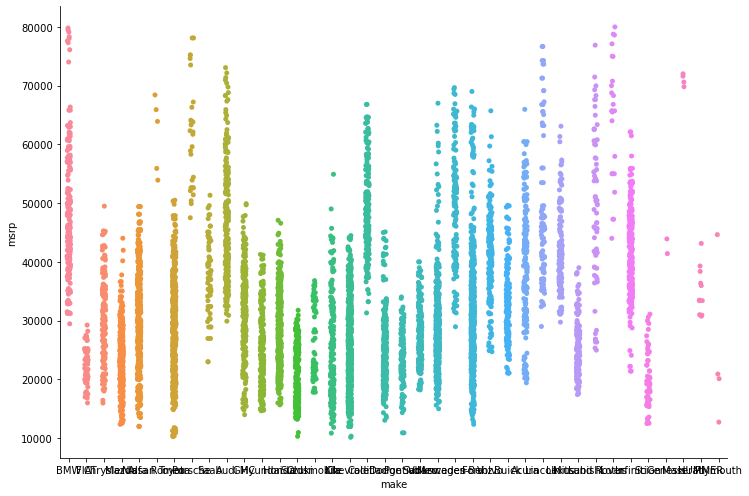

In [177]:
sns.catplot(x="make",y="msrp", data=df_temp, height=7, aspect=1.5)

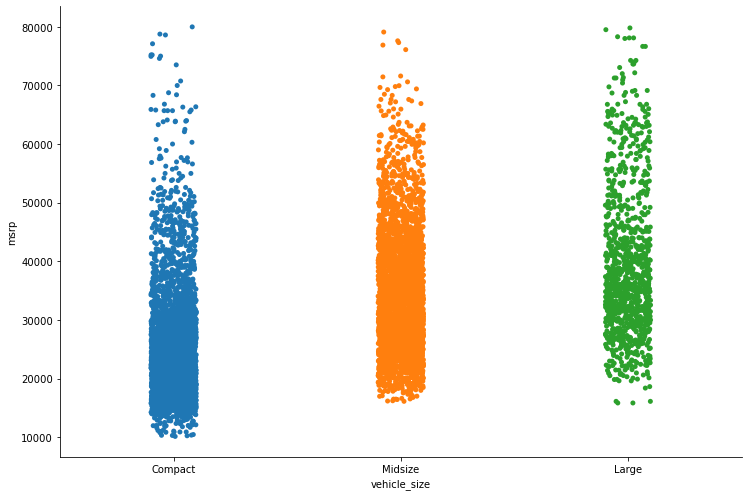

In [178]:
sns.catplot(x="vehicle_size",y="msrp", data=df_temp, height=7, aspect=1.5)

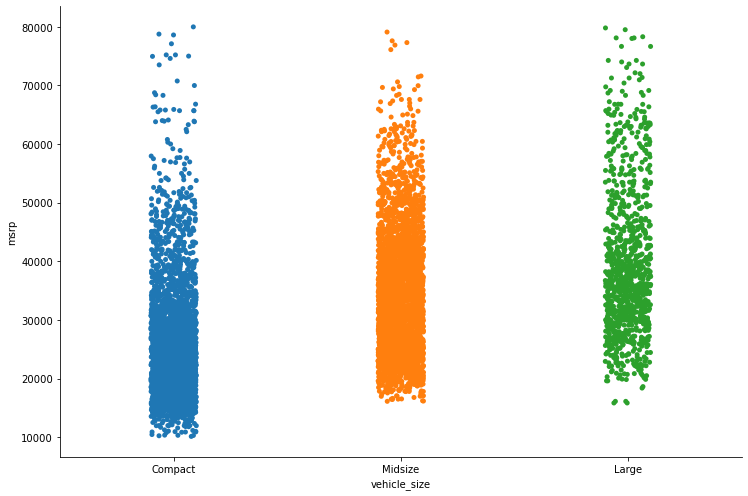

In [179]:
sns.catplot(x="vehicle_size",y="msrp", data=df_temp, height=7, aspect=1.5)

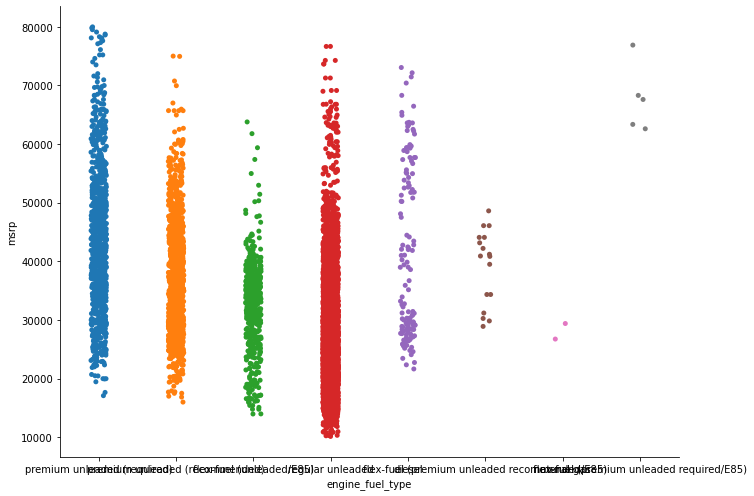

In [180]:
sns.catplot(x="engine_fuel_type",y="msrp", data=df_temp, height=7, aspect=1.5)

In [208]:
# Collapse vehicle styles - keep top 4, then consolidate hatchbacks, suvs, vans and pickups as seen below
m = {"coupe": ['coupe'],
     "convertible": ['convertible'],
     "sedan": ['sedan'],
     'wagon':['wagon'],
     'hatchback':['4dr_hatchback','2dr_hatchback'],
     'suv':['4dr_suv','2dr_suv','convertible_suv'],
     'van':['passenger_minivan','cargo_minivan','cargo_van','passenger_van'],
     'pickup':['crew_cab_pickup','regular_cab_pickup','extended_cab_pickup']
    }

# convert mapping above into a temporary dataframe
temp = pd.Series(m).explode().sort_values().to_frame().reset_index()
# give the columns names for easier merging
temp.columns = ['new_vehicle_style','vehicle_style']
# update df to include new vehicle style - use left join
df = pd.merge(left = df,right = temp, how='left', left_on='vehicle_style', right_on='vehicle_style')
# drop old vehicle style variable
df.drop('vehicle_style',axis=1,inplace=True)

KeyError: 'vehicle_style'

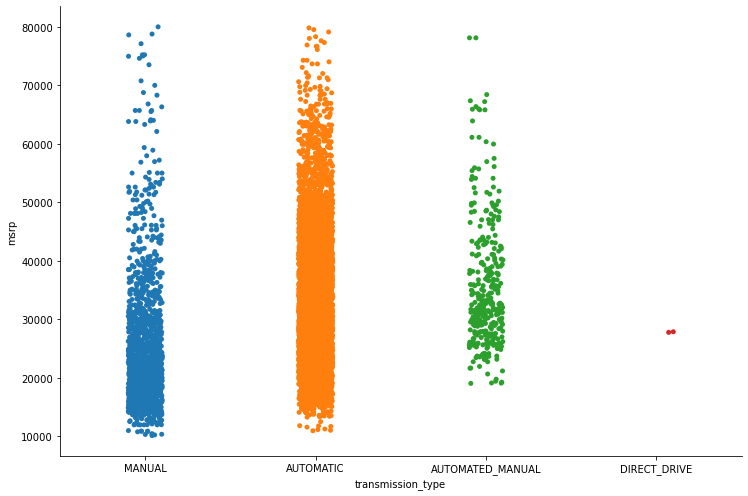

In [181]:
sns.catplot(x="transmission_type",y="msrp", data=df_temp, height=7, aspect=1.5)

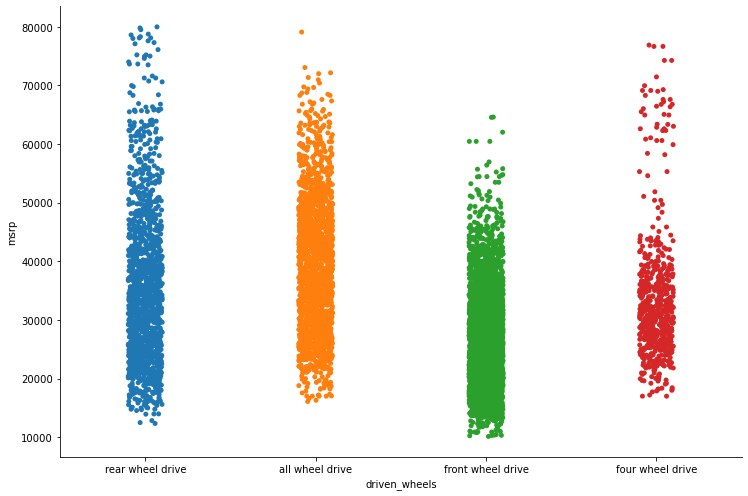

In [182]:
sns.catplot(x="driven_wheels",y="msrp", data=df_temp, height=7, aspect=1.5)

In [184]:
global_mean = df_temp['msrp'].mean()

for col in df_temp.columns[1:]:
    df_group = df_temp.groupby(by=col).msrp.agg(['mean']).round(2)
    df_group['diff'] = (df_group['mean'] - global_mean).round(2)
    display(df_group)

,mean,diff
make,,
Acura,39137.54,7408.09
Alfa Romeo,61600.00,29870.55
Audi,47040.00,15310.55
BMW,48234.09,16504.64
Buick,32763.07,1033.62
Cadillac,48338.73,16609.28
Chevrolet,25236.82,-6492.63
Chrysler,30851.61,-877.84
Dodge,25290.20,-6439.25


,mean,diff
engine_fuel_type,,
diesel,41345.96,9616.51
flex-fuel (premium unleaded recommended/E85),39149.41,7419.96
flex-fuel (premium unleaded required/E85),67744.00,36014.55
flex-fuel (unleaded/E85),32201.53,472.08
natural gas,28065.00,-3664.45
premium unleaded (recommended),37050.31,5320.86
premium unleaded (required),43553.54,11824.09
regular unleaded,27723.84,-4005.61


,mean,diff
transmission_type,,
AUTOMATED_MANUAL,35447.88,3718.43
AUTOMATIC,33274.72,1545.27
DIRECT_DRIVE,27822.50,-3906.95
MANUAL,24998.34,-6731.11


,mean,diff
driven_wheels,,
all wheel drive,38860.43,7130.98
four wheel drive,33370.16,1640.71
front wheel drive,26308.57,-5420.88
rear wheel drive,35751.30,4021.85


,mean,diff
vehicle_size,,
Compact,26192.34,-5537.11
Large,39313.66,7584.21
Midsize,34721.65,2992.20


,mean,diff
vehicle_style,,
2dr Hatchback,22684.46,-9044.99
2dr SUV,27899.23,-3830.22
4dr Hatchback,23214.67,-8514.78
4dr SUV,35470.24,3740.79
Cargo Minivan,22803.73,-8925.72
Cargo Van,21457.73,-10271.72
Convertible,38322.01,6592.56
Convertible SUV,26257.00,-5472.45
Coupe,34714.96,2985.51


>**Finally converting categorical values into numerical values**

In [200]:
# Create temp dataframe with target and categorical variables only
categorical = ['object']
X = pd.merge(df['msrp'],df.select_dtypes(include=categorical),left_index=True,right_index=True)

# Compute average target values for all categorical alternatives
target_by_cats(X)

,mean,diff
engine_fuel_type,,
diesel,41345.96,9616.51
flex-fuel (premium unleaded recommended/E85),39149.41,7419.96
flex-fuel (premium unleaded required/E85),67744.00,36014.55
flex-fuel (unleaded/E85),32201.53,472.08
natural gas,28065.00,-3664.45
premium unleaded (recommended),37050.31,5320.86
premium unleaded (required),43553.54,11824.09
regular unleaded,27723.84,-4005.61


,mean,diff
transmission_type,,
AUTOMATED_MANUAL,35447.88,3718.43
AUTOMATIC,33274.72,1545.27
DIRECT_DRIVE,27822.50,-3906.95
MANUAL,24998.34,-6731.11


,mean,diff
driven_wheels,,
all wheel drive,38860.43,7130.98
four wheel drive,33370.16,1640.71
front wheel drive,26308.57,-5420.88
rear wheel drive,35751.30,4021.85


,mean,diff
new_vehicle_style,,


In [201]:
# Keep top 5 Makes and label all the rest as "OTHER"
keep = df['make'].value_counts().index[:5]
df['make'] = np.where(df['make'].isin(keep), df['make'], 'OTHER')

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7496 entries, 0 to 7495
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   make               7496 non-null   category
 1   year               7496 non-null   int64   
 2   engine_fuel_type   7496 non-null   object  
 3   engine_hp          7496 non-null   float64 
 4   transmission_type  7496 non-null   object  
 5   driven_wheels      7496 non-null   object  
 6   number_of_doors    7496 non-null   float64 
 7   vehicle_size       7496 non-null   category
 8   city_mpg           7496 non-null   int64   
 9   msrp               7496 non-null   int64   
 10  new_vehicle_style  0 non-null      object  
dtypes: category(2), float64(2), int64(3), object(4)
memory usage: 601.7+ KB


### 4. Data Visualization 

### 5. Modeling

> **Feature Selection** <a class="anchor" id="feature-selection"></a>
<br>

> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

>This is simple for now - may need to add more sampling complexity in future


> **Model 1** <a class="anchor" id="first-model"></a>
<br>
>Instructions:<br>
>Text

In [206]:
predictors = ['engine_hp', 'make']

target = ['msrp']

X = df[predictors]
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=2)

In [192]:
simple_var = ['engine_hp']

model = LinearRegression()
model.fit(X_train[simple_var],y_train)

# Display Output
train_test_metrics(X_train[simple_var],X_test[simple_var],y_train,y_test,model)

                 Train            Test
R2                0.59            0.61
Adj-R2            0.59            0.61
MAE            5456.27         5371.32
MAPE             17.30           17.00
SSE    287669820613.28 119221288933.43


In [194]:
# Since our target variable was tranformed with the natural log function
# we need to do the following conversion of our predictor variable coefficient
# to more easily interpret it
round((math.exp(model.coef_[0])-1)*100,2)

1.2434497080108436e+62

>**Model Summary:**<br>
>We can not explain MSRP through our model through simple linear progression.
<br><br>
>**Coefficient Interpretation:**<br>
>-Using the conversion above we get 1.24
>-In words, this means that for each additional HP we expect the rate to increase by 1.2%, all other things held constant.
<br><br>
>**Overfitting:**<br>
>No overfitting here - not expecting it given such a simple model.
<br><br>

> **Model 2** <a class="anchor" id="second-model"></a>
<br>
>Instructions:<br>
>Regression model with TWO predictors: one numeric,one categorical:
>- Sticking with engine_hp for the one numeric predictor
>- For categorical variable I'll go with 'transmission_type'
>- My rationale is that this is perhaps one of the most common changes in a car
>- could make to increase their nightly rate

In [207]:
predictors = ['engine_hp','make']

model2 = LinearRegression()
model2.fit(X_train[predictors],y_train)

# Display Output
train_test_metrics(X_train[predictors],X_test[predictors],y_train,y_test,model2)

ValueError: could not convert string to float: 'OTHER'

In [117]:
# Let's look at some model artifacts
# make class predictions for the testing set
y_train_pred_class=model.predict(X_train)
y_test_pred_class = model.predict(X_test)

samples = 20 #using this below
# Put predicted probabilities in a dataframe - add column names
a = pd.DataFrame(model.predict_proba(X_test)[0:samples, :],columns=['p_msrp_less40(0)','p_msrp_above40(1)'])

# Append dataframe above to include class predictions
a['class_pred']=y_test_pred_class[0:samples]

# Append dataframe above to include actual class assignments
a['class_actual'] = y_test.iloc[0:samples,0].values

# Display dataframe
a

NameError: name 'model' is not defined

In [209]:
a['class_pred_new'] = (model.predict_proba(X_test)[:,1] >= 0.5).astype(int)[:20]

AttributeError: 'LinearRegression' object has no attribute 'predict_proba'

In [210]:
# Let's build some functionality to loop through many different options for our 
# probability threshold

# Create list of threshold values
threshold = np.arange(0,1,0.05).tolist()

# Create empty lists to store metric values created within loop
Train_Accuracy = []
Test_Accuracy = []

for i in threshold:
    
    # Create class assignments given threshold value
    y_train_pred_class = (model.predict_proba(X_train)[:,1] >= i).astype(int)
    y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)
    
    # Create Metrics
    train_accuracy_value = metrics.accuracy_score(y_train, y_train_pred_class).round(2)
    test_accuracy_value = metrics.accuracy_score(y_test, y_test_pred_class).round(2)
    
    # Append lists
    Train_Accuracy.append(train_accuracy_value)
    Test_Accuracy.append(test_accuracy_value)

# Create dataframe
result = pd.DataFrame({"Threshold":threshold,
                       "Train_Accuracy": Train_Accuracy,
                       "Test_Accuracy": Test_Accuracy
                      })

# Let's look at our dataframe
result

AttributeError: 'LinearRegression' object has no attribute 'predict_proba'

### 6. Deployment

### 7. Appendix

### 8. Daily & Credential Log

- [ ] Appendix data : Link - For Referring data on MSRP : https://www.investopedia.com/terms/m/manufacturers-suggested-retail-price-msrp.asp